In [6]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

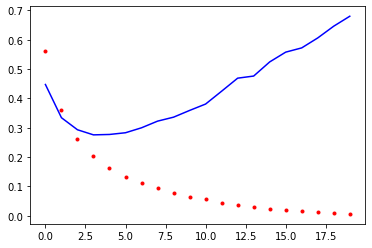

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(10000, )))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

with tf.device("/cpu:0"):
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                  loss=losses.binary_crossentropy, 
                  metrics=[metrics.binary_accuracy])

    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]

    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
l = history.history["loss"]
vl = history.history["val_loss"]
x = range(len(l))
plt.plot(x, l, "r.")
plt.plot(x, vl, "b")
plt.show()